In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import requests
from datetime import datetime, timedelta

zones = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']

In [24]:
f_init = np.zeros(len(df_np_observed_february.index))

border_flows_obs = {
    'AT-CZ': f_init.copy(), 'AT-DE': f_init.copy(), 'AT-HU': f_init.copy(), 'AT-SI': f_init.copy(), 'BE-FR': f_init.copy(),
    'BE-NL': f_init.copy(), 'CZ-AT': f_init.copy(), 'CZ-DE': f_init.copy(), 'CZ-PL': f_init.copy(), 'CZ-SK': f_init.copy(), 
    'DE-AT': f_init.copy(), 'DE-CZ': f_init.copy(), 'DE-FR': f_init.copy(), 'DE-NL': f_init.copy(), 'FR-BE': f_init.copy(),
    'FR-DE': f_init.copy(), 'HR-HU': f_init.copy(), 'HR-SI': f_init.copy(), 'HU-AT': f_init.copy(), 'HU-HR': f_init.copy(),
    'HU-SK': f_init.copy(), 'NL-BE': f_init.copy(), 'NL-DE': f_init.copy(), 'PL-CZ': f_init.copy(), 'SI-AT': f_init.copy(),
    'SI-HR': f_init.copy(), 'SK-CZ': f_init.copy(), 'SK-HU': f_init.copy(), 'HU-RO': f_init.copy(), 'BE-DE': f_init.copy(),
    'DE-BE': f_init.copy(), 'DE-PL': f_init.copy(), 'HU-SI': f_init.copy(), 'PL-DE': f_init.copy(), 'PL-SK': f_init.copy(),
    'RO-HU': f_init.copy(), 'SI-HU': f_init.copy(), 'SK-PL': f_init.copy(),
}

In [25]:
def retrieve_scheduled_exchanges(fromDate, toDate):
    data = {
        'fromUtc': f'{fromDate}T00:00:00.000Z',
        'toUtc': f'{toDate}T23:00:00.000Z',
    }

    try:
        response = requests.post('https://publicationtool.jao.eu/core/api/data/scheduledExchanges', json=data)
        response.raise_for_status()
    except requests.exceptions.HTTPError as err:
        print(err)
        
    return pd.DataFrame(response.json()['data'])

In [26]:
start = datetime(2023, 2, 1).strftime('%Y-%m-%d')
end = datetime(2023, 3, 1).strftime('%Y-%m-%d')

df_exchanges = retrieve_scheduled_exchanges(start, end)
df_exchanges = df_exchanges.rename(columns={
    'dateTimeUtc': 'DateTime'
})
df_exchanges = df_exchanges.set_index('DateTime')
df_exchanges.index = pd.to_datetime(df_exchanges.index)
df_exchanges = df_exchanges.tz_localize(None)

In [28]:
for t, timestamp in enumerate(df_np_observed_february.index):
    for border in df_exchanges.columns[1:]:
        z1 = border[7:9]
        z2 = border[10:12]
        if z1 + '-' + z2 in border_flows_obs.keys():
            border_flows_obs[z1 + '-' + z2][t] += df_exchanges.loc[timestamp, border]

In [2]:
df_ptdf_obs = pd.read_excel('../flow_based_domain/ptdf_z_obs.xlsx', index_col=0)

In [37]:
df_ptdf_forecasts = []
print('alpha 10')
df_ptdf_forecasts.append(pd.read_excel('../flow_based_domain/ptdf_z_calc_nuts.xlsx', index_col=0))
print('alpha 7')
df_ptdf_forecasts.append(pd.read_excel('../flow_based_domain/ptdf_z_calc_nuts_feb_7.xlsx', index_col=0))
print('alpha 5')
df_ptdf_forecasts.append(pd.read_excel('../flow_based_domain/ptdf_z_calc_nuts_feb_5.xlsx', index_col=0))
print('alpha 4')
df_ptdf_forecasts.append(pd.read_excel('../flow_based_domain/ptdf_z_calc_nuts_feb_4.xlsx', index_col=0))
print('tso selection')
df_ptdf_forecasts.append(pd.read_excel('../flow_based_domain/ptdf_z_calc_nuts_feb_tso.xlsx', index_col=0))

alpha 10
alpha 7
alpha 5
alpha 4
tso selection


In [3]:
df_grid = pd.read_excel('../flow_based_domain/grid.xlsx', index_col=0)

In [8]:
# February
start_date_feb = pd.Timestamp('20230201')
end_date_feb = pd.Timestamp('20230301')

df_np_observed = pd.read_excel("./data/net_positions.xlsx", index_col=0)
df_np_observed_february = df_np_observed.loc[(df_np_observed.index > start_date_feb) & (df_np_observed.index <= end_date_feb)]

In [30]:
border_flows_obs = {
    'AT-CZ': f_init.copy(), 'AT-DE': f_init.copy(), 'AT-HU': f_init.copy(), 'AT-SI': f_init.copy(), 'BE-FR': f_init.copy(),
    'BE-NL': f_init.copy(), 'CZ-AT': f_init.copy(), 'CZ-DE': f_init.copy(), 'CZ-PL': f_init.copy(), 'CZ-SK': f_init.copy(), 
    'DE-AT': f_init.copy(), 'DE-CZ': f_init.copy(), 'DE-FR': f_init.copy(), 'DE-NL': f_init.copy(), 'FR-BE': f_init.copy(),
    'FR-DE': f_init.copy(), 'HR-HU': f_init.copy(), 'HR-SI': f_init.copy(), 'HU-AT': f_init.copy(), 'HU-HR': f_init.copy(),
    'HU-SK': f_init.copy(), 'NL-BE': f_init.copy(), 'NL-DE': f_init.copy(), 'PL-CZ': f_init.copy(), 'SI-AT': f_init.copy(),
    'SI-HR': f_init.copy(), 'SK-CZ': f_init.copy(), 'SK-HU': f_init.copy(), 'HU-RO': f_init.copy(), 'BE-DE': f_init.copy(),
    'DE-BE': f_init.copy(), 'DE-PL': f_init.copy(), 'HU-SI': f_init.copy(), 'PL-DE': f_init.copy(), 'PL-SK': f_init.copy(),
    'RO-HU': f_init.copy(), 'SI-HU': f_init.copy(), 'SK-PL': f_init.copy(),
}

for t, timestamp in enumerate(df_np_observed_february.index):
    cnes = df_ptdf_obs[df_ptdf_obs.DateTime == timestamp]
    for cne_i, cne in cnes.iterrows():
        eic = df_grid.loc[cne['line_id'], 'eic']
        if df_grid.loc[cne['line_id'], 'tieline'] and eic[:4] == '10T-':
            z1 = eic[4:6]
            z2 = eic[7:9]
            flow = 0
            for zone in zones:
                flow += cne[zone] * df_np_forecast.loc[timestamp, zone]
            
            if flow < 0:
                border_flows_obs[z1 + '-' + z2][t] += -1*flow
            else:
                border_flows_obs[z2 + '-' + z1][t] += flow

In [39]:
border_flow_forecasts = []

df_np_forecasts = []
df_np_forecasts.append(pd.read_excel("./np_forecasts/np_forecast_full_nuts_norm_1_w_atc_february.xlsx"))
df_np_forecasts.append(pd.read_excel("./np_forecasts/np_forecast_full_alpha7_norm_1_w_atc_february.xlsx"))
df_np_forecasts.append(pd.read_excel("./np_forecasts/np_forecast_full_alpha5_norm_1_w_atc_february.xlsx"))
df_np_forecasts.append(pd.read_excel("./np_forecasts/np_forecast_full_alpha4_norm_1_w_atc_february.xlsx"))
df_np_forecasts.append(pd.read_excel("./np_forecasts/np_forecast_full_tso_norm_1_w_atc_february.xlsx"))

for index, df in enumerate(df_np_forecasts):
    df_np_forecasts[index].index = df_np_observed_february.index

    border_flows_calc = {
        'AT-CZ': f_init.copy(), 'AT-DE': f_init.copy(), 'AT-HU': f_init.copy(), 'AT-SI': f_init.copy(), 'BE-FR': f_init.copy(),
        'BE-NL': f_init.copy(), 'CZ-AT': f_init.copy(), 'CZ-DE': f_init.copy(), 'CZ-PL': f_init.copy(), 'CZ-SK': f_init.copy(), 
        'DE-AT': f_init.copy(), 'DE-CZ': f_init.copy(), 'DE-FR': f_init.copy(), 'DE-NL': f_init.copy(), 'FR-BE': f_init.copy(),
        'FR-DE': f_init.copy(), 'HR-HU': f_init.copy(), 'HR-SI': f_init.copy(), 'HU-AT': f_init.copy(), 'HU-HR': f_init.copy(),
        'HU-SK': f_init.copy(), 'NL-BE': f_init.copy(), 'NL-DE': f_init.copy(), 'PL-CZ': f_init.copy(), 'SI-AT': f_init.copy(),
        'SI-HR': f_init.copy(), 'SK-CZ': f_init.copy(), 'SK-HU': f_init.copy(), 'HU-RO': f_init.copy(), 'BE-DE': f_init.copy(),
        'DE-BE': f_init.copy(), 'DE-PL': f_init.copy(), 'HU-SI': f_init.copy(), 'PL-DE': f_init.copy(), 'PL-SK': f_init.copy(),
        'RO-HU': f_init.copy(), 'SI-HU': f_init.copy(), 'SK-PL': f_init.copy(),
    }

    for t, timestamp in enumerate(df_np_observed_february.index):
        if 'DateTime' in df_ptdf_forecasts[index].columns:
            cnes = df_ptdf_forecasts[index][df_ptdf_forecasts[index].DateTime == timestamp]
        else:
            cnes = df_ptdf_forecasts[index][df_ptdf_forecasts[index].index == timestamp]
        for cne_i, cne in cnes.iterrows():
            eic = df_grid.loc[cne['line_id'], 'eic']
            if df_grid.loc[cne['line_id'], 'tieline'] and eic[:4] == '10T-':
                z1 = eic[4:6]
                z2 = eic[7:9]
                flow = 0
                for zone in zones:
                    flow += cne[zone] * df_np_forecasts[index].loc[timestamp, zone]

                if flow < 0:
                    border_flows_calc[z1 + '-' + z2][t] += -1*flow
                else:
                    border_flows_calc[z2 + '-' + z1][t] += flow
        
    border_flow_forecasts.append(border_flows_calc)

AT-CZ


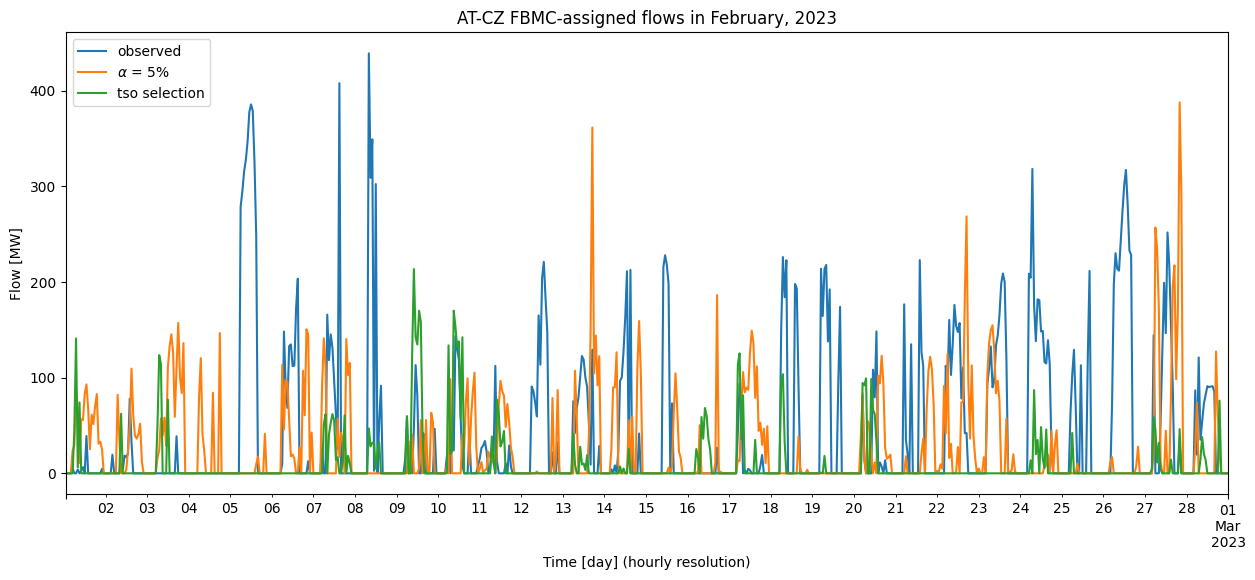

AT-DE


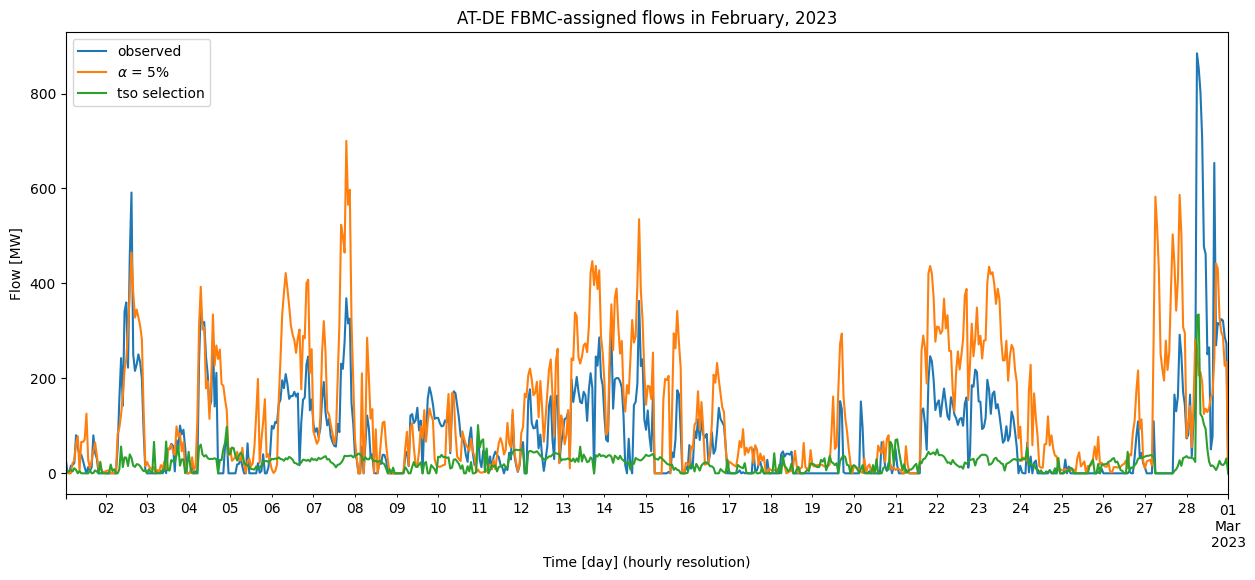

AT-HU


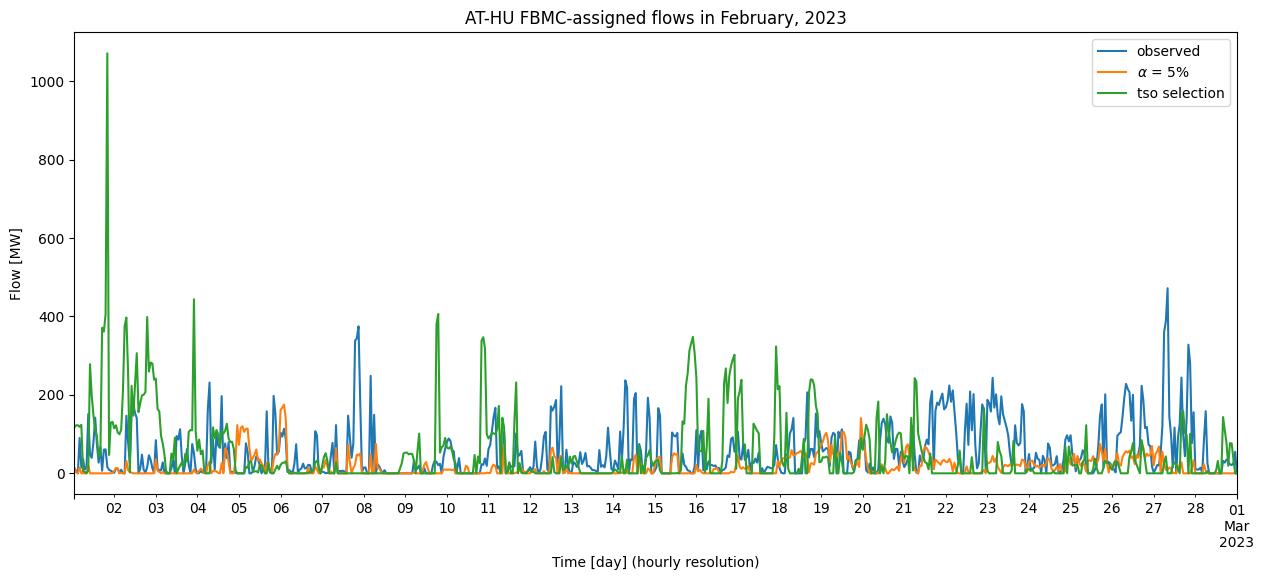

AT-SI


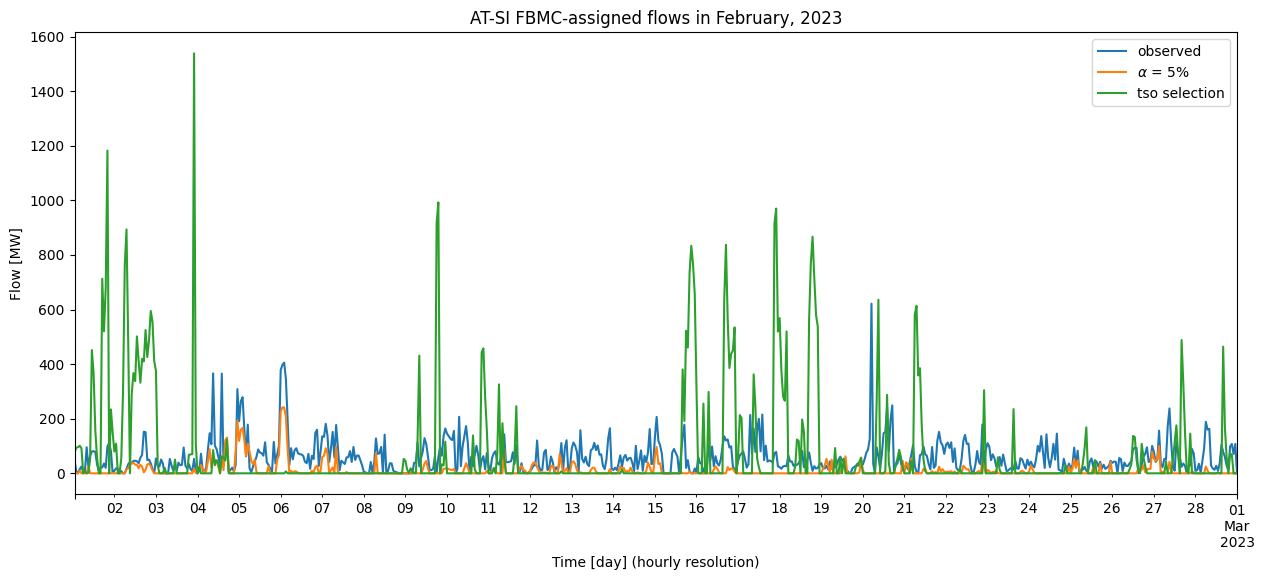

BE-FR


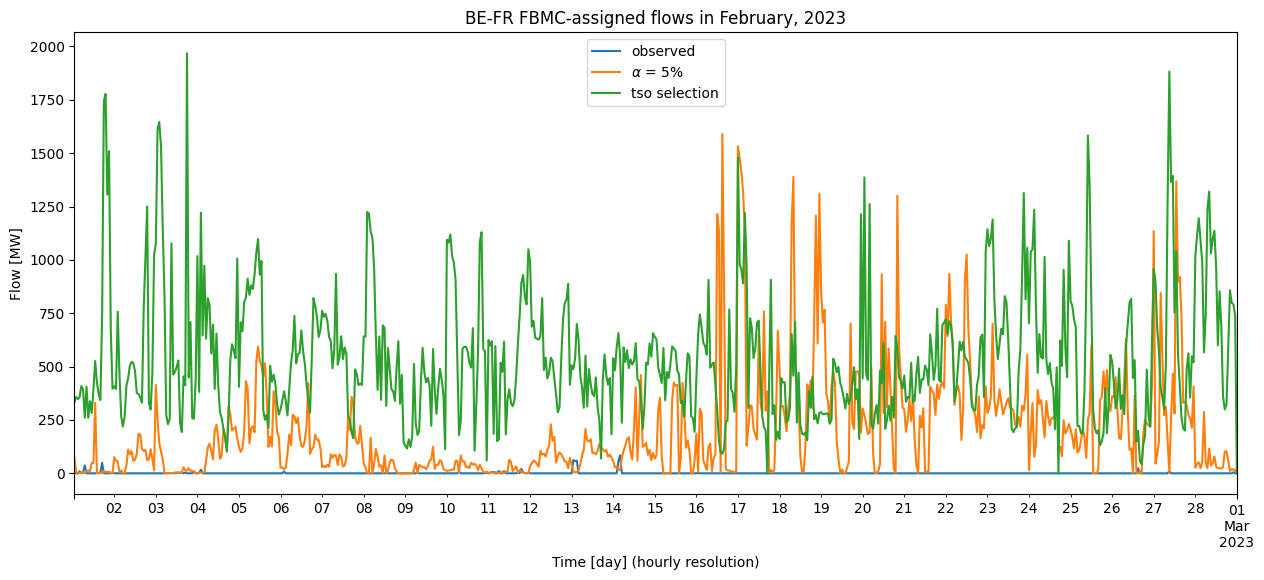

BE-NL


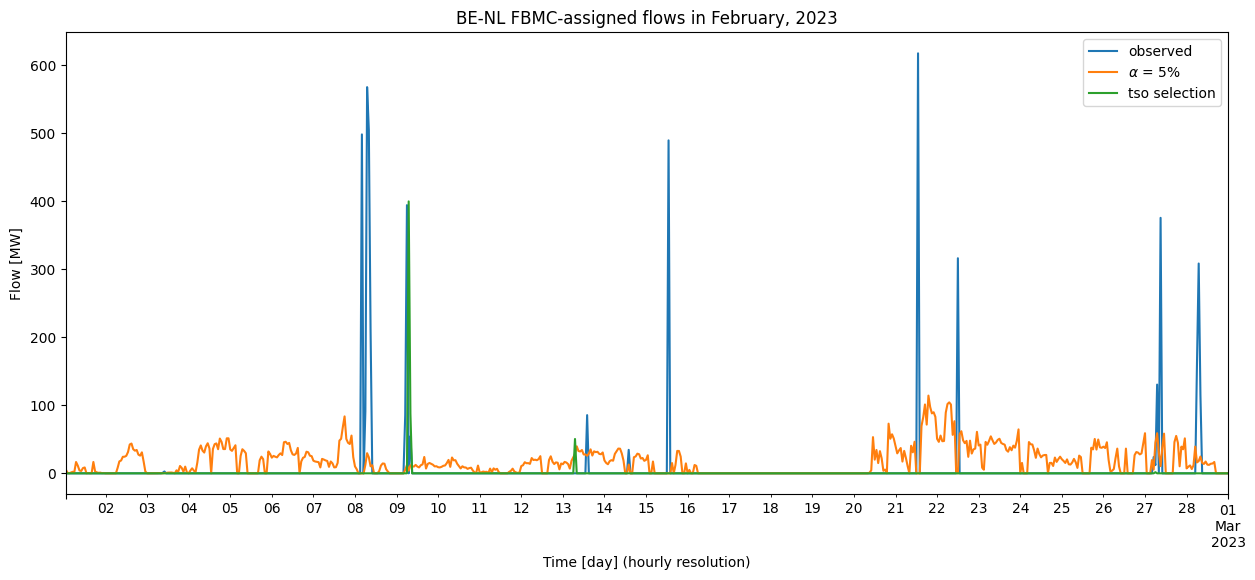

CZ-AT


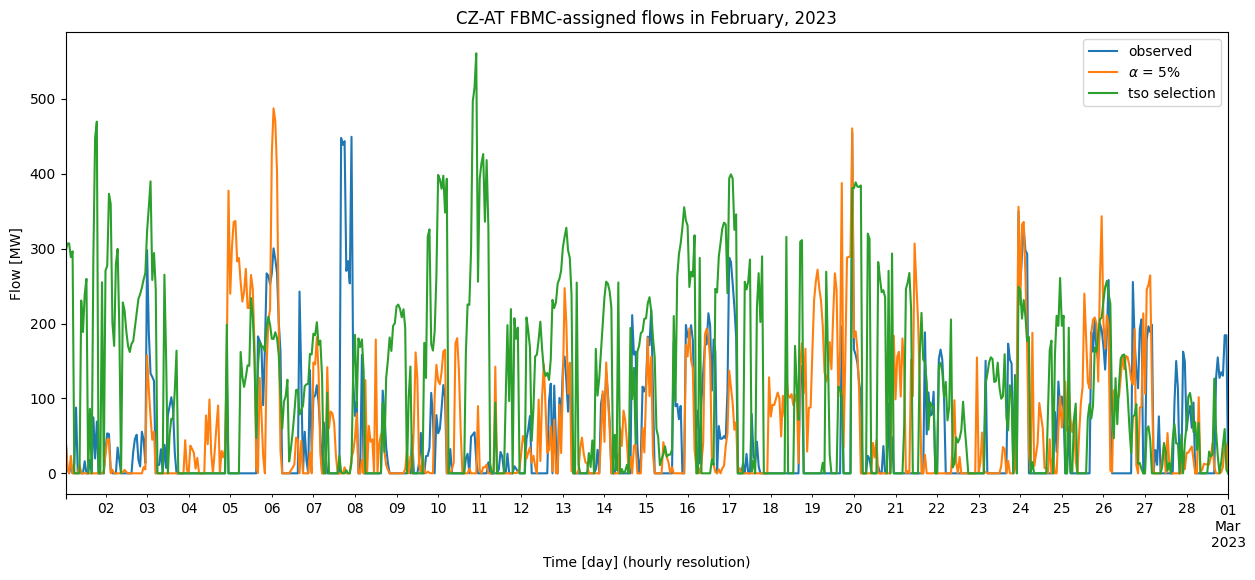

CZ-DE


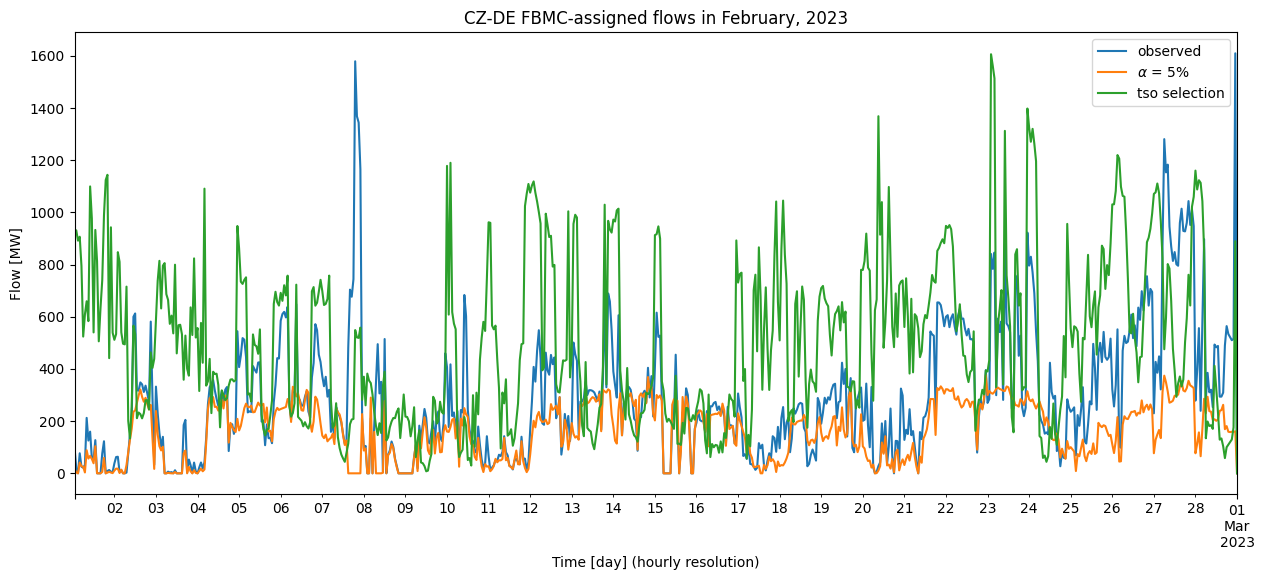

CZ-PL


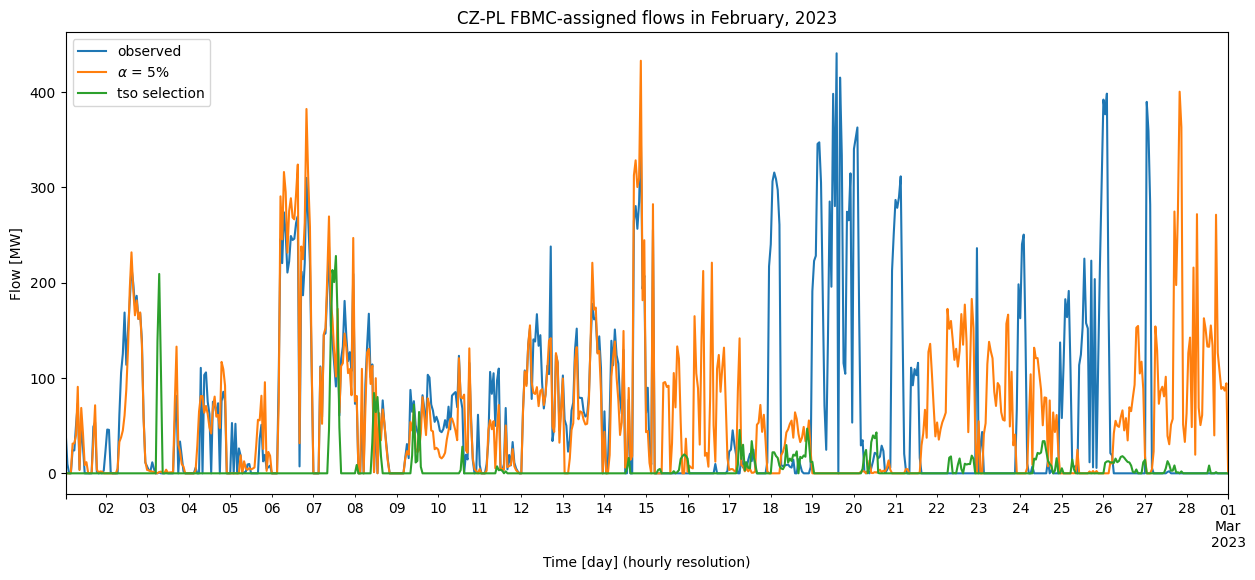

CZ-SK


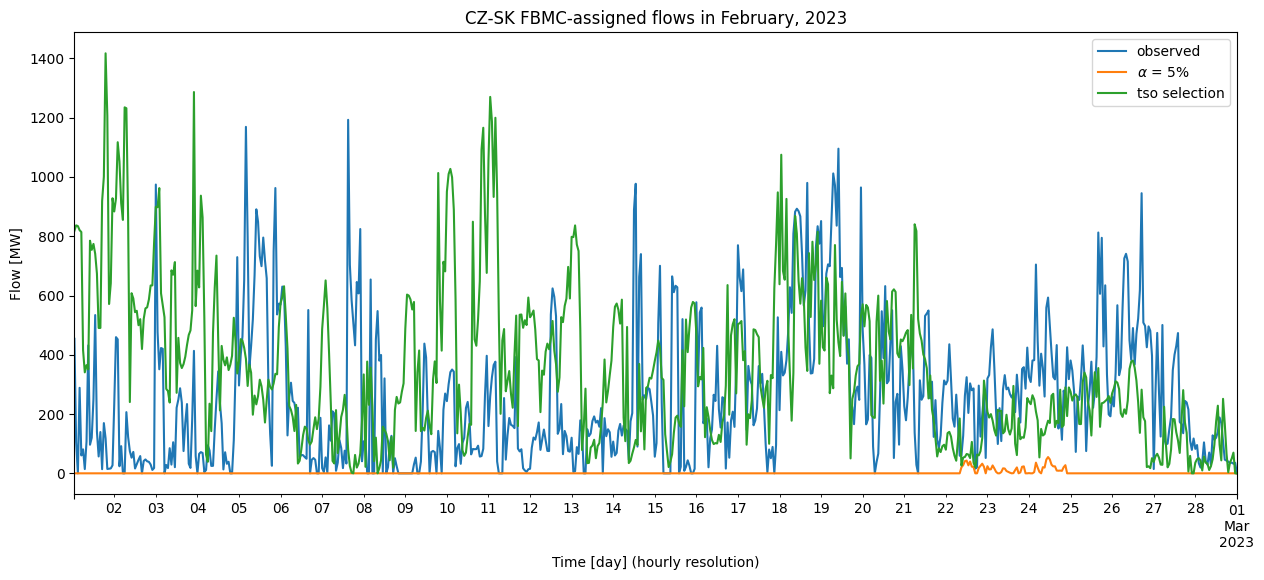

DE-AT


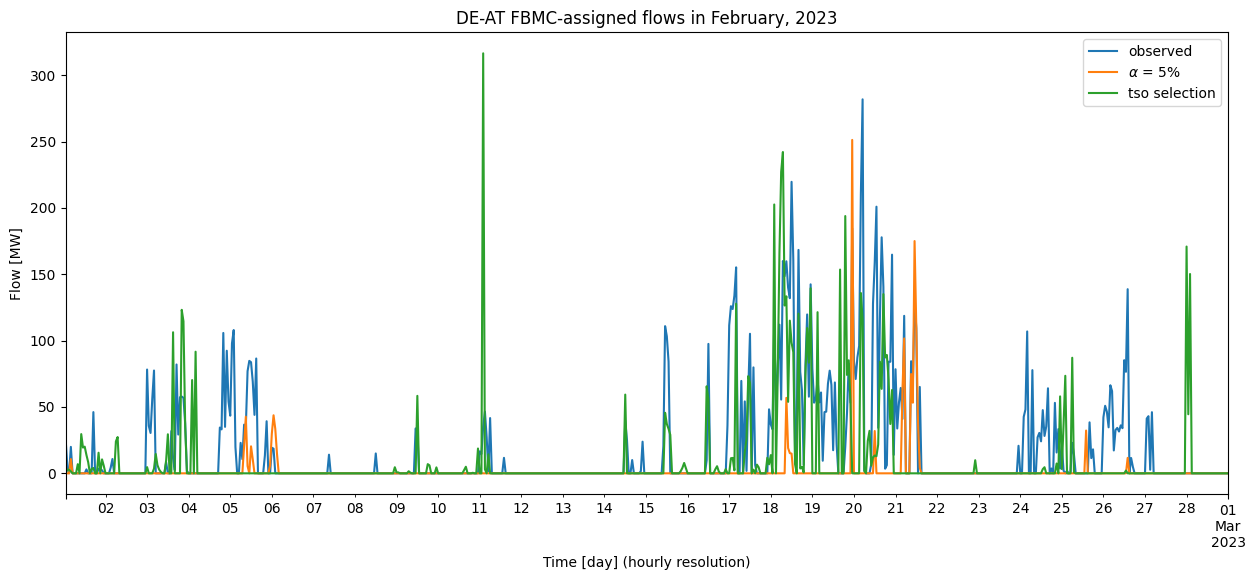

DE-CZ


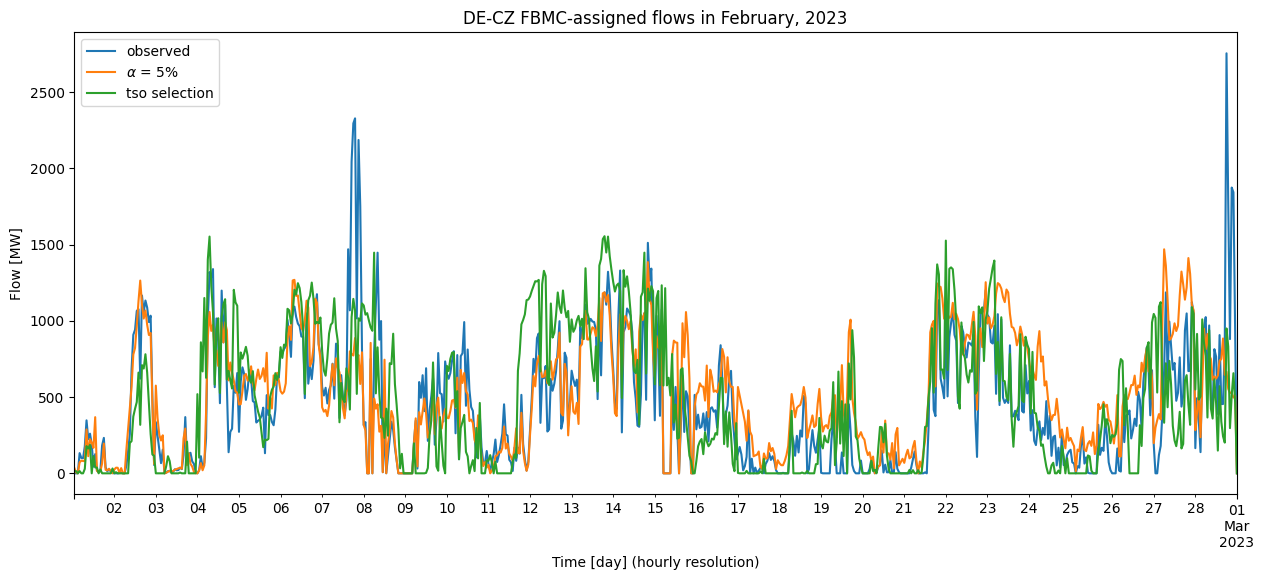

DE-FR


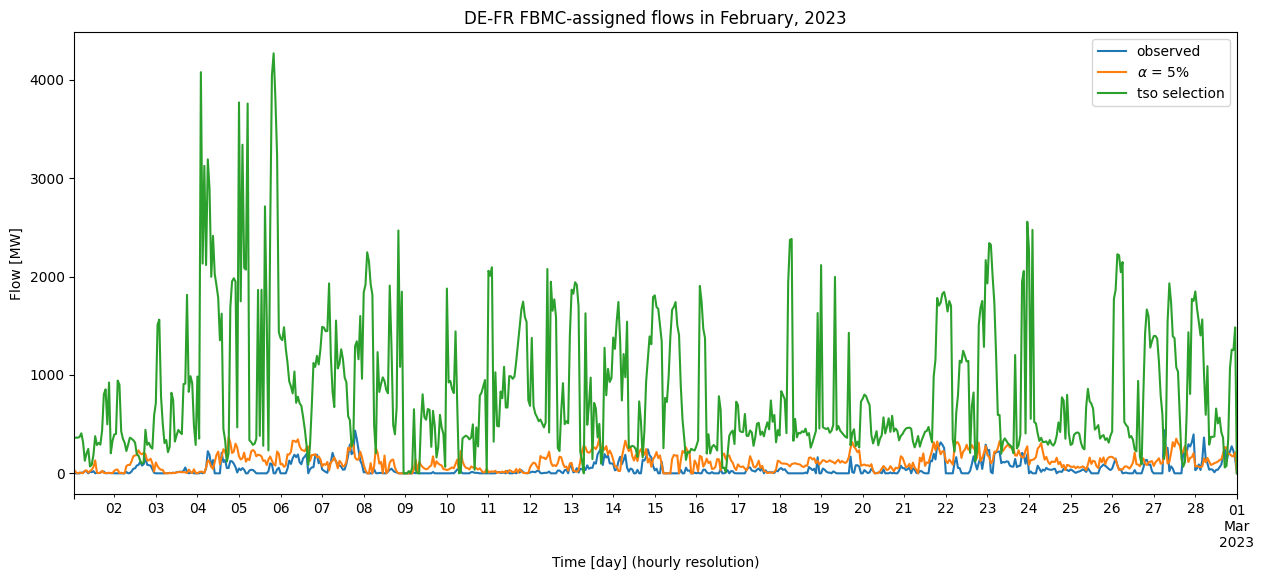

DE-NL


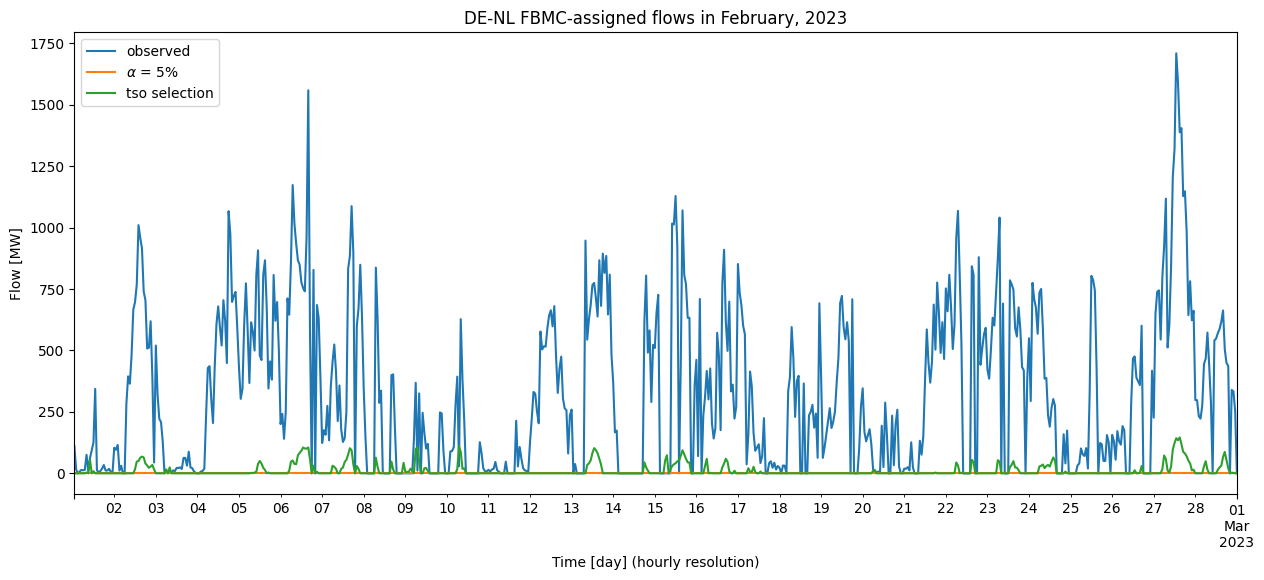

FR-BE


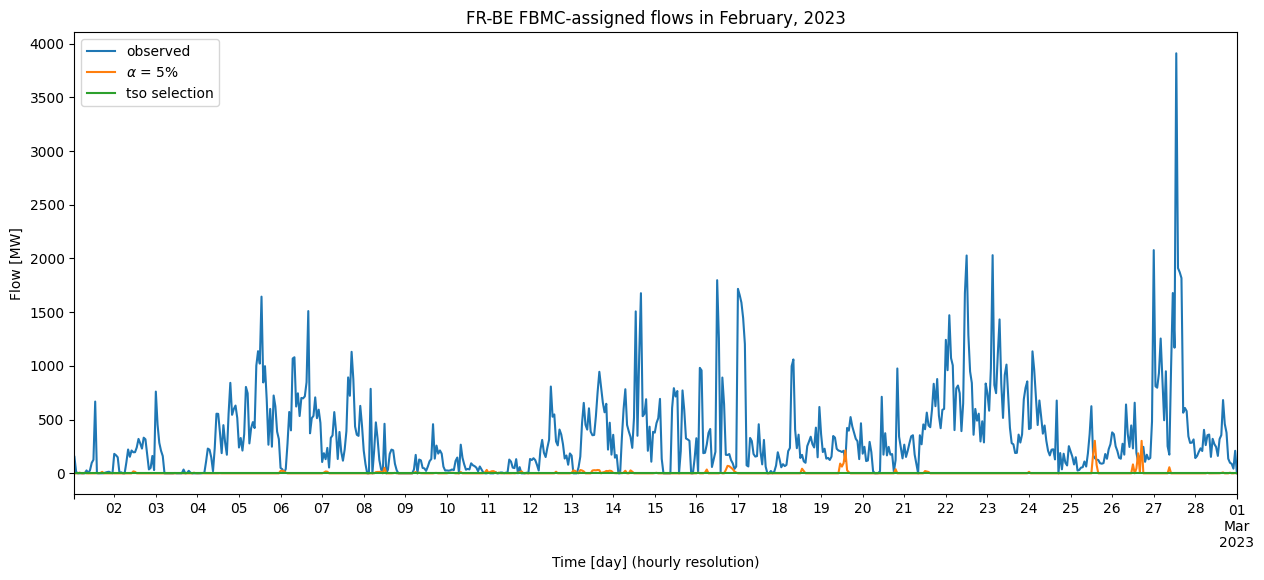

FR-DE


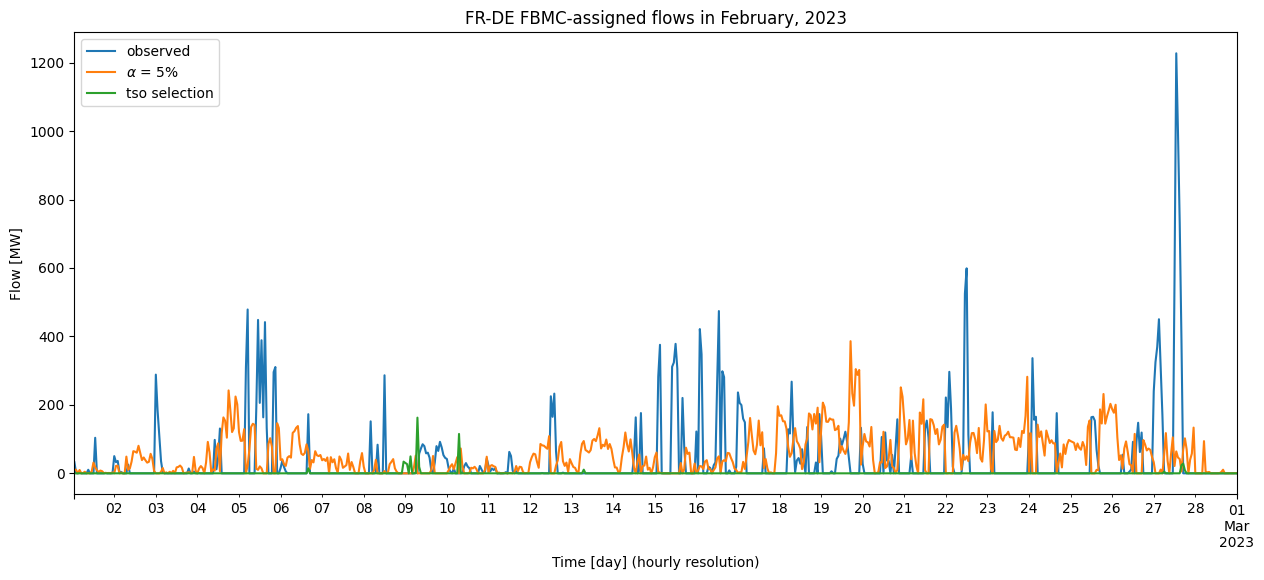

HR-HU


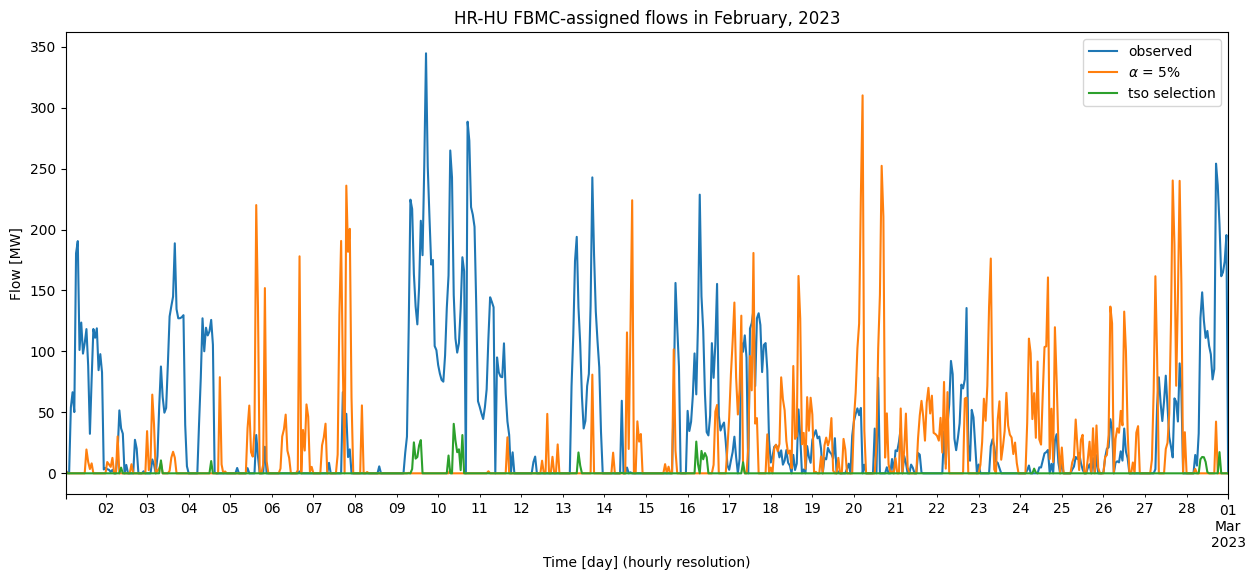

HR-SI


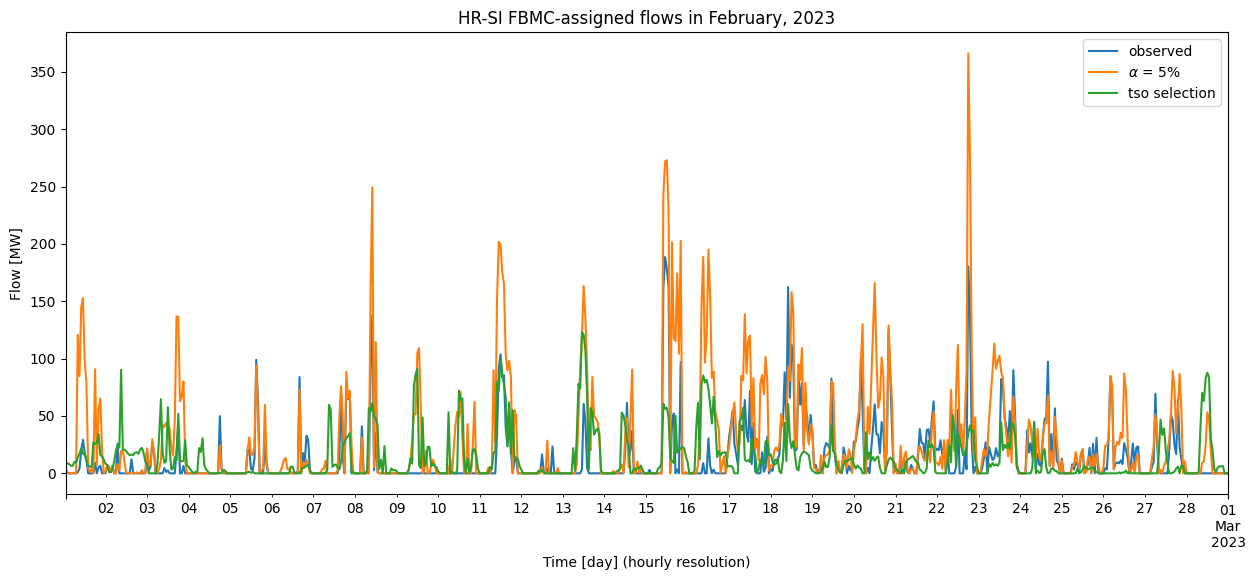

HU-AT


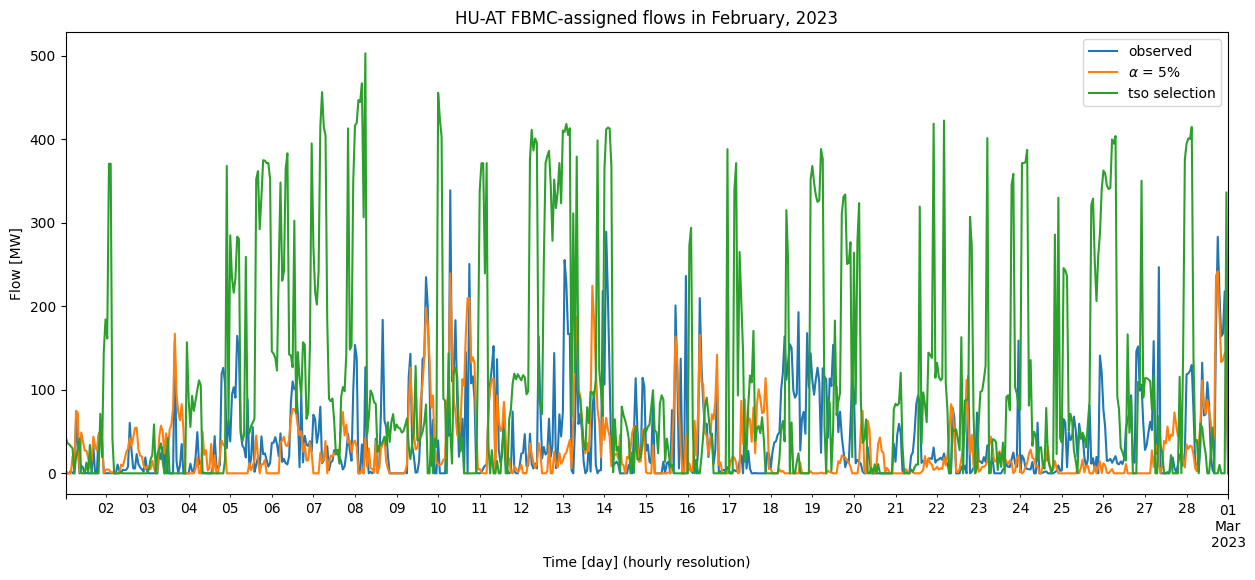

HU-HR


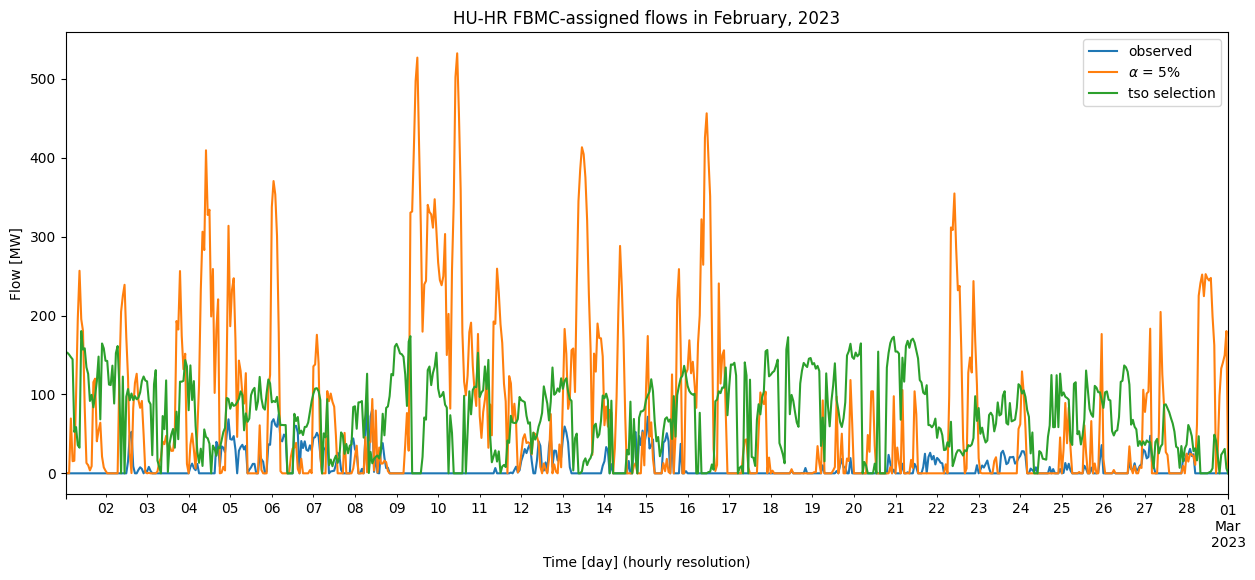

HU-SK


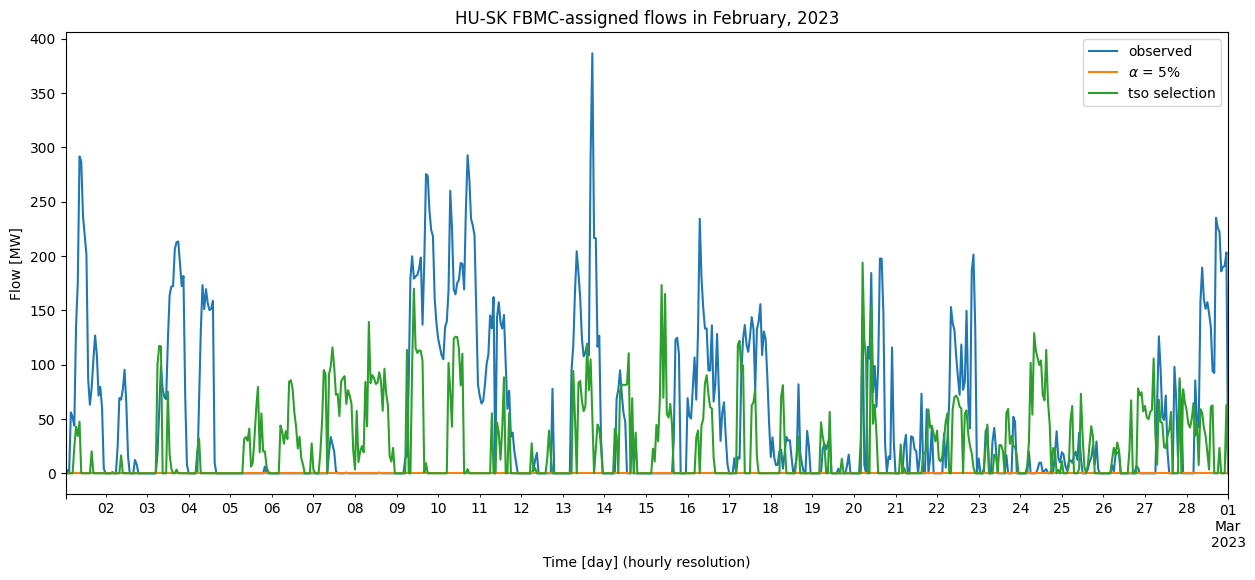

NL-BE


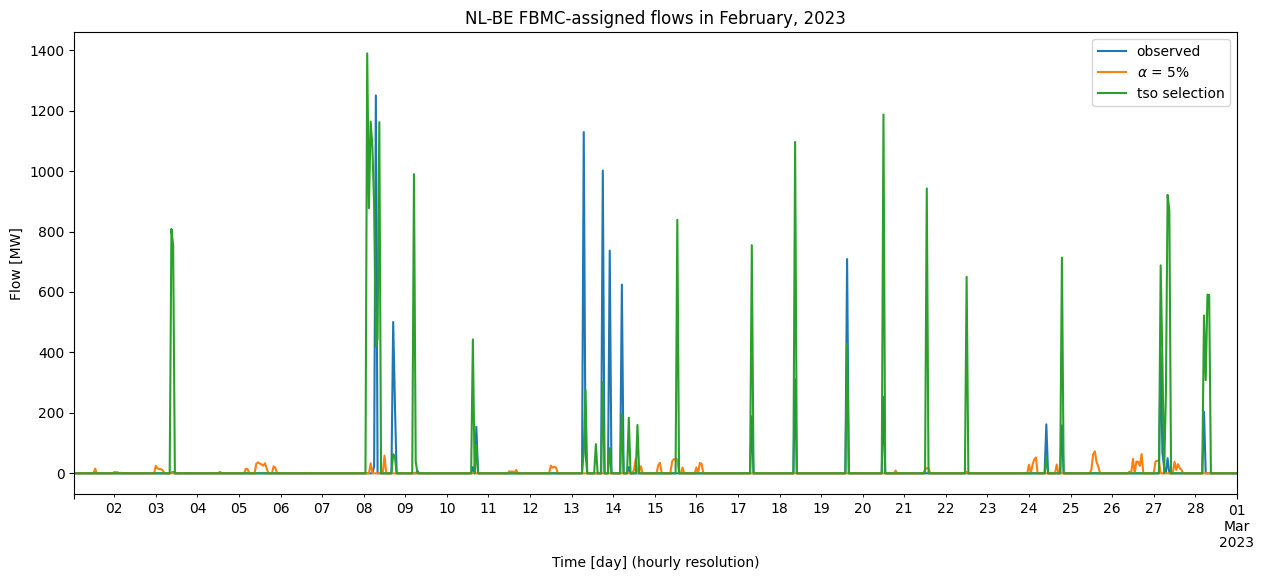

NL-DE


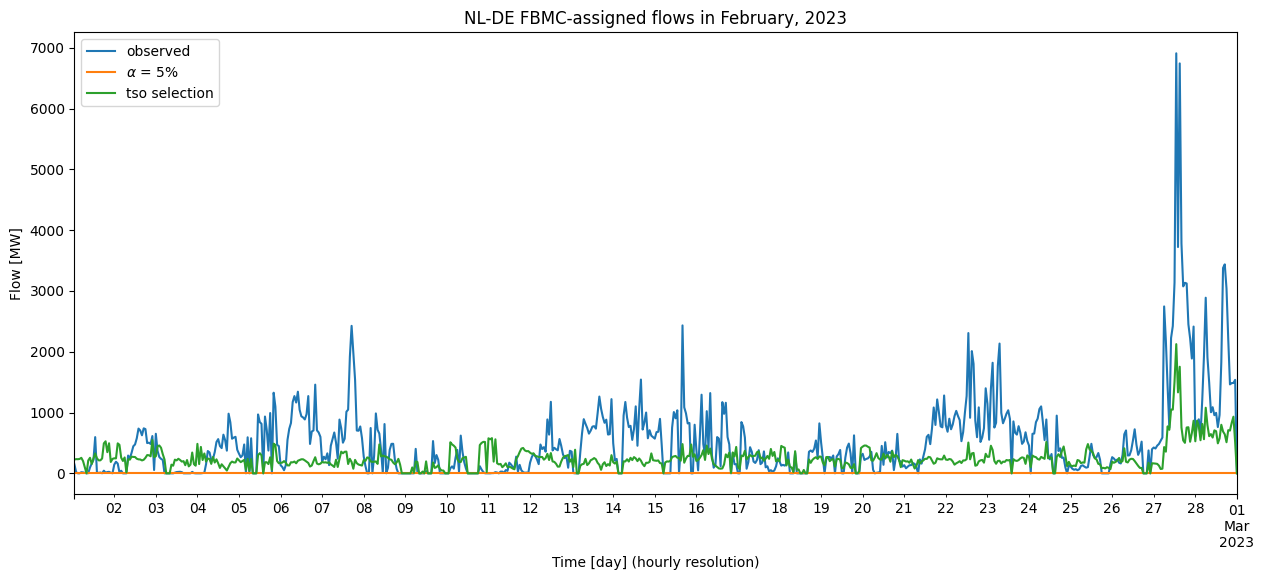

PL-CZ


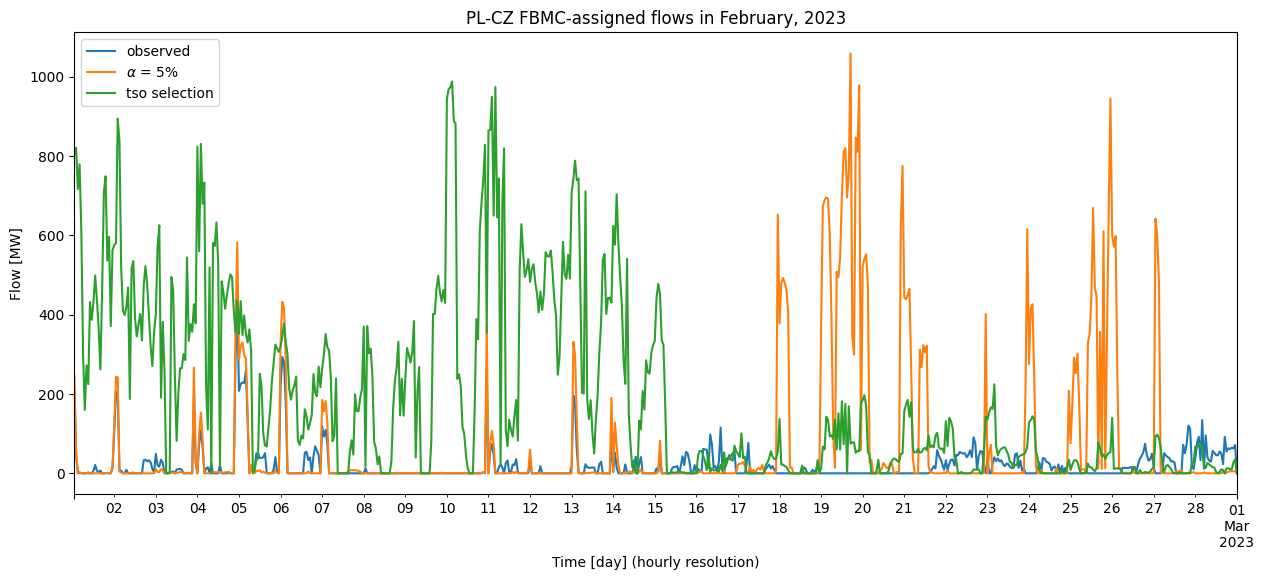

SI-AT


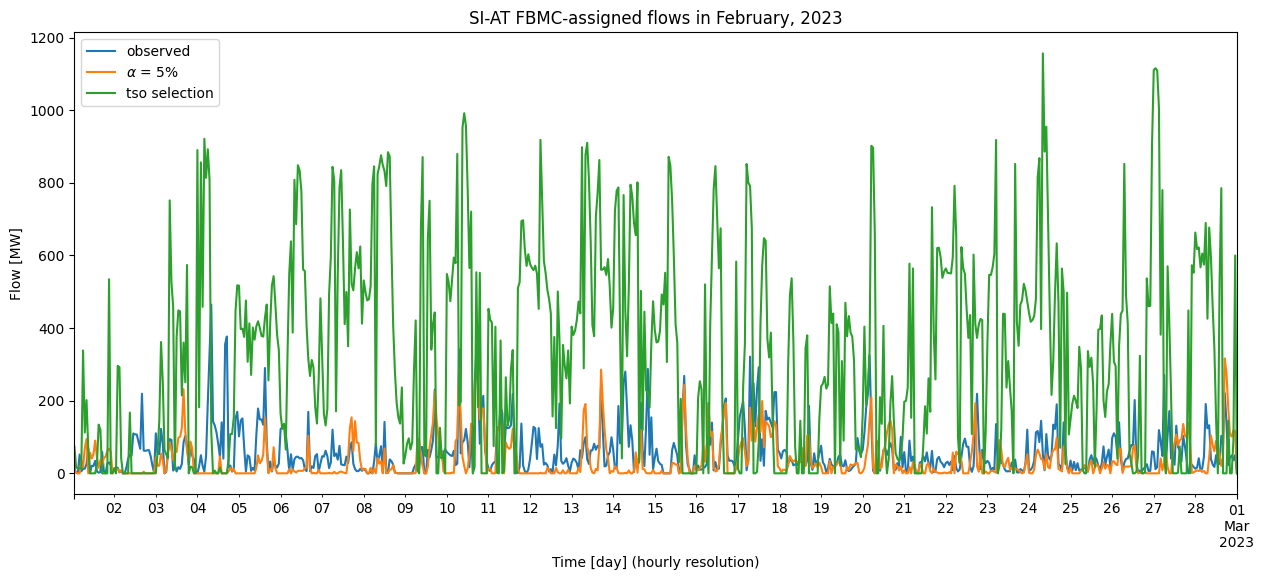

SI-HR


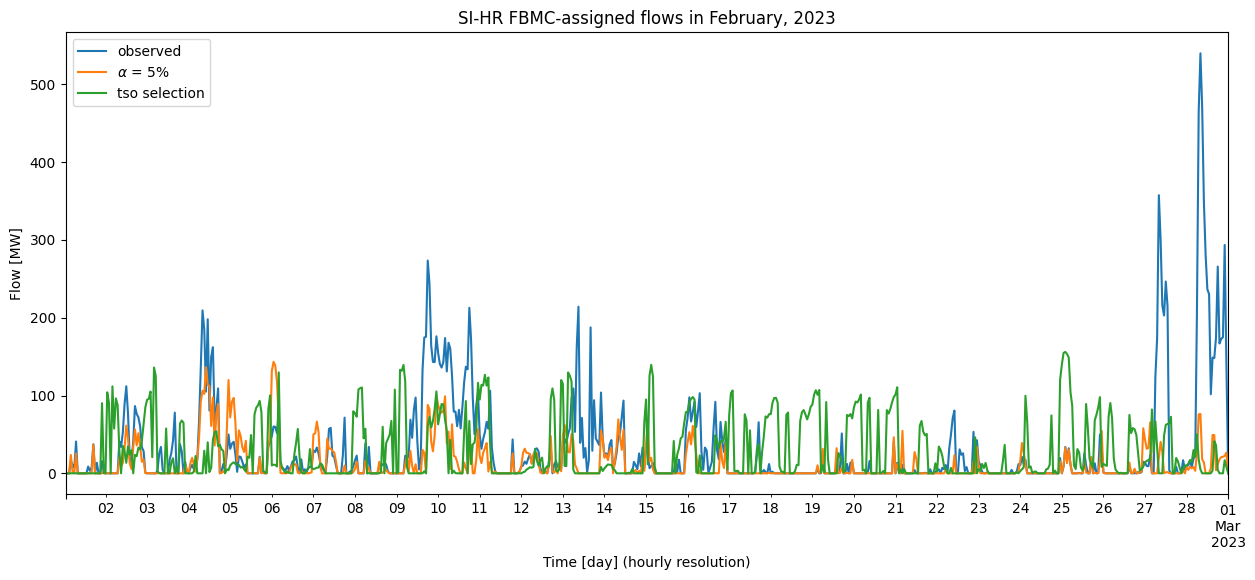

SK-CZ


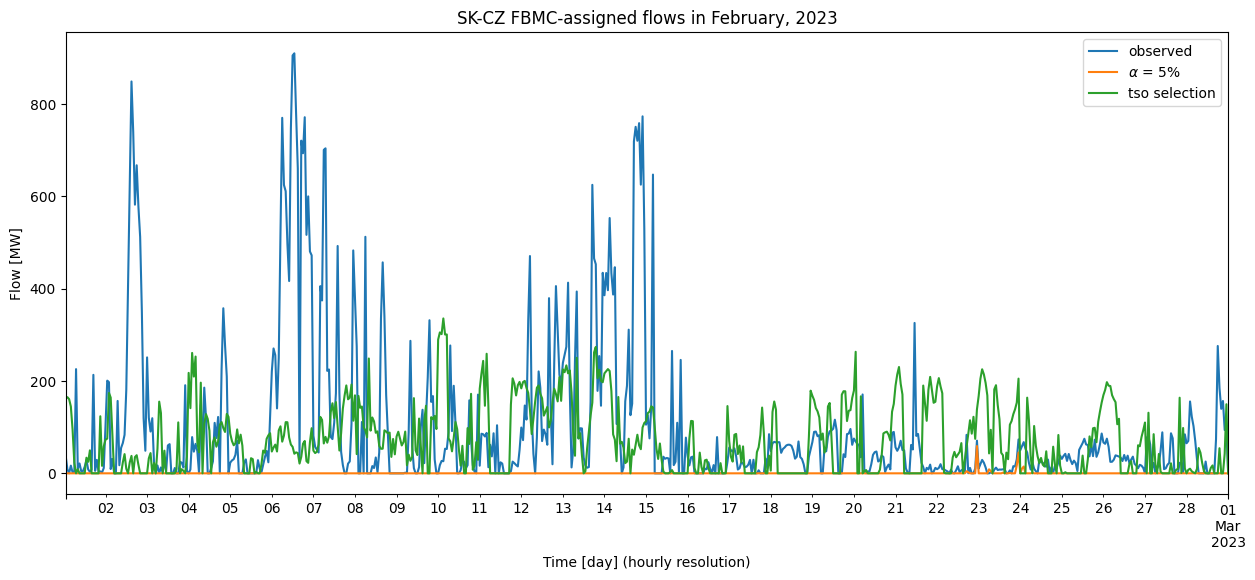

SK-HU


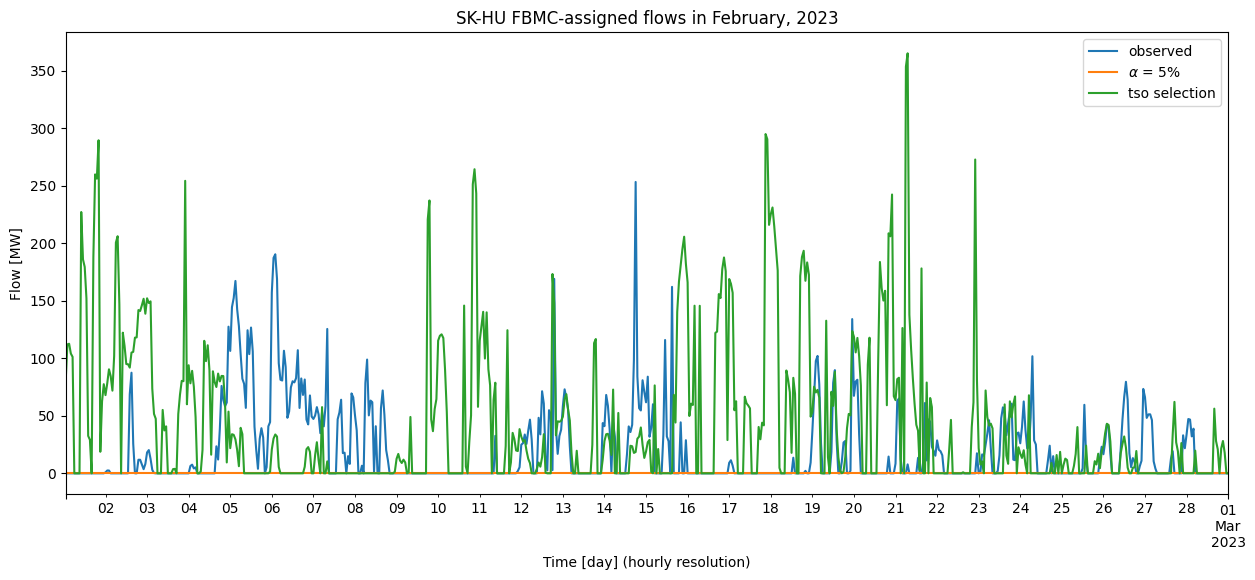

HU-RO


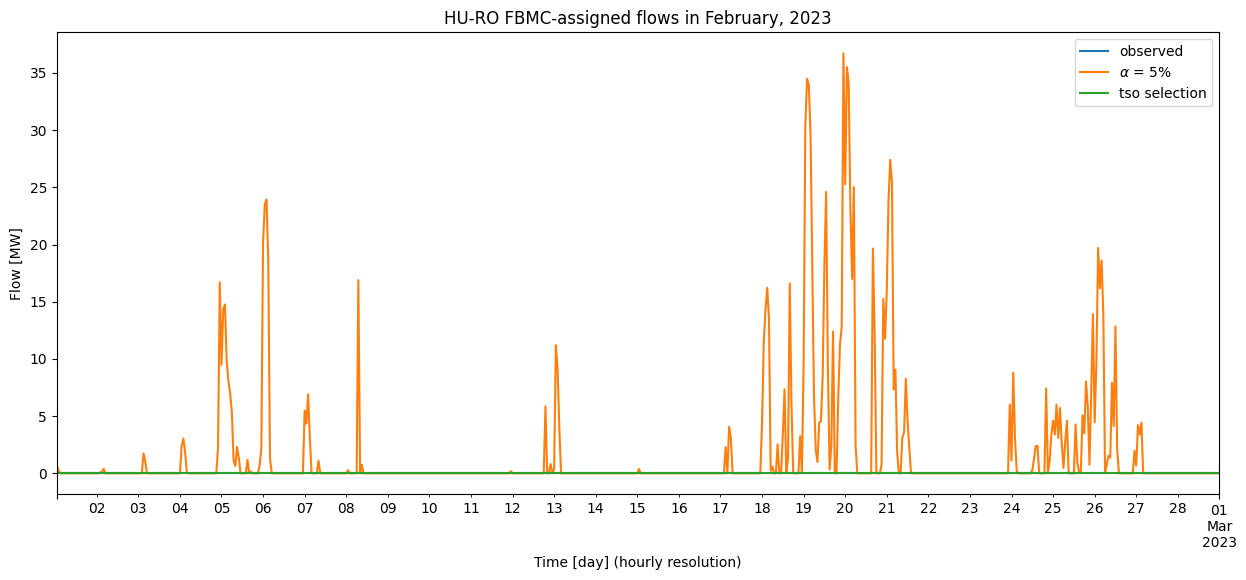

BE-DE


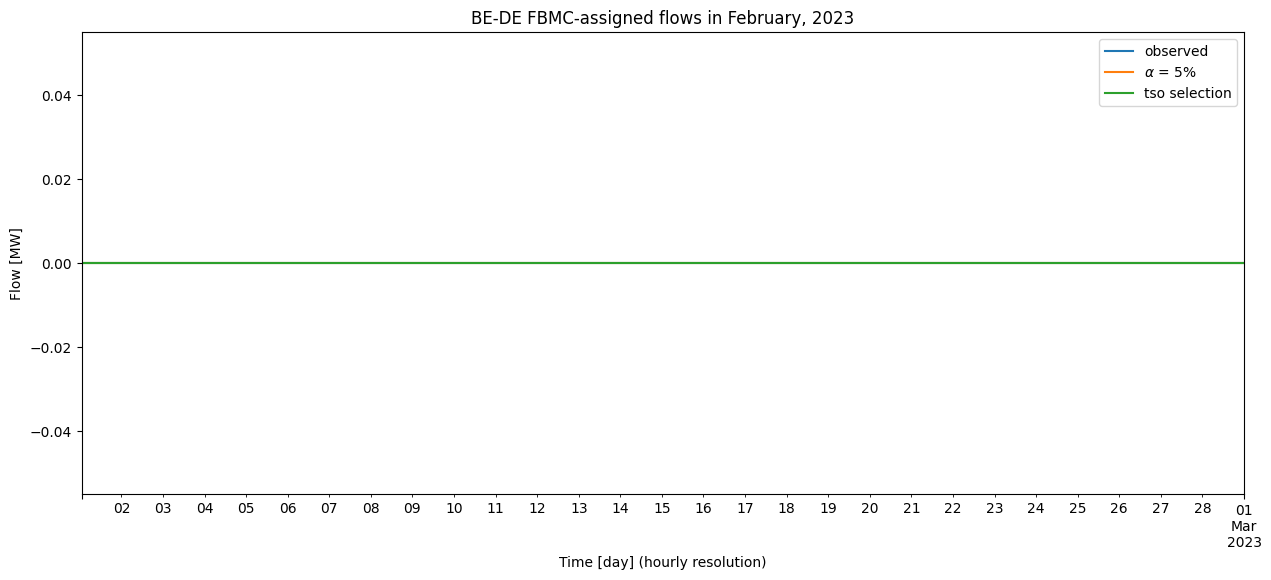

DE-BE


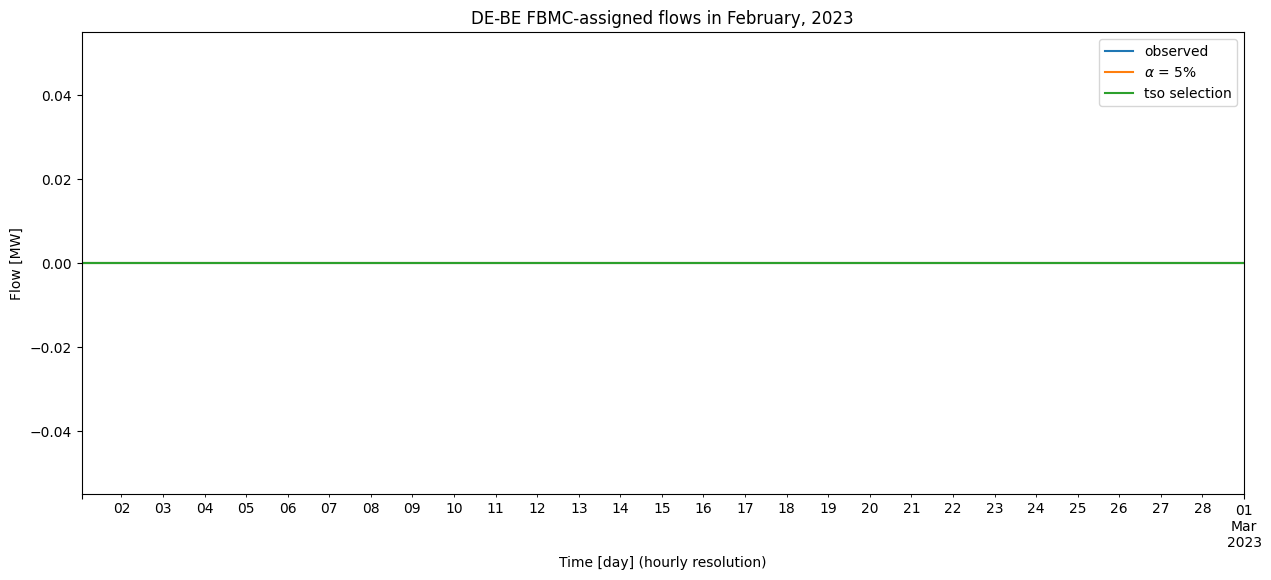

DE-PL


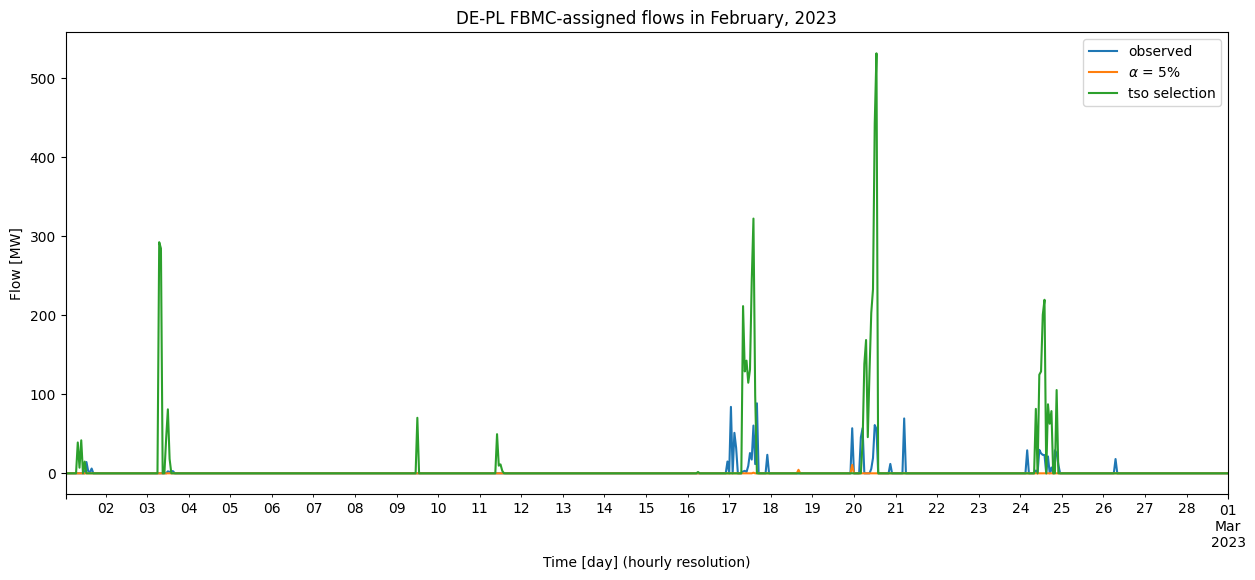

HU-SI


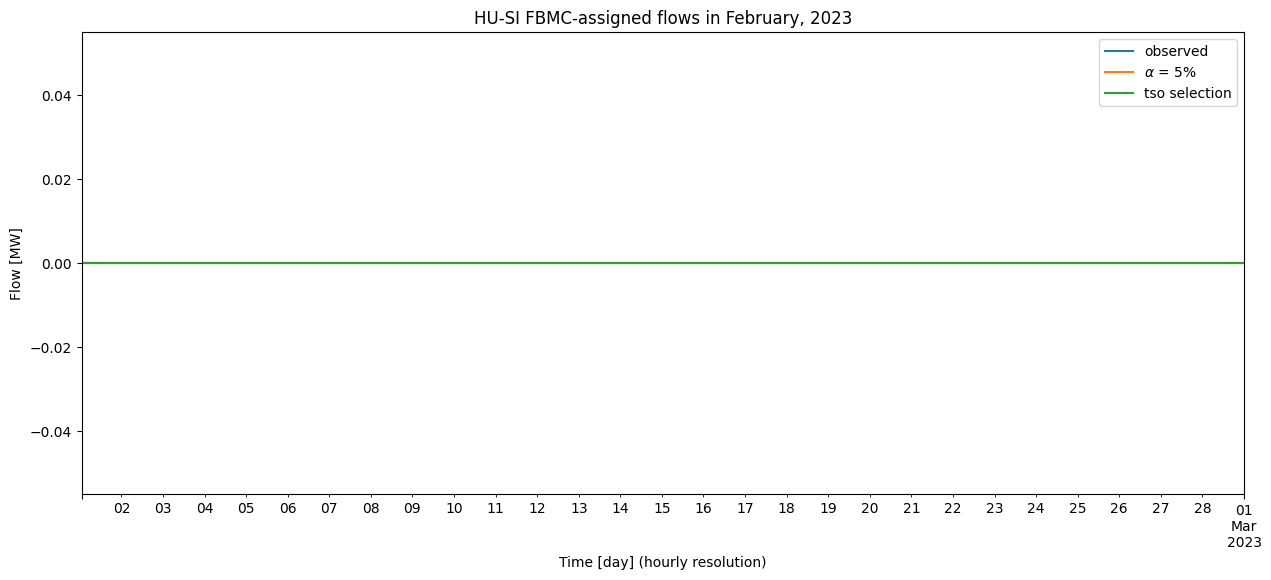

PL-DE


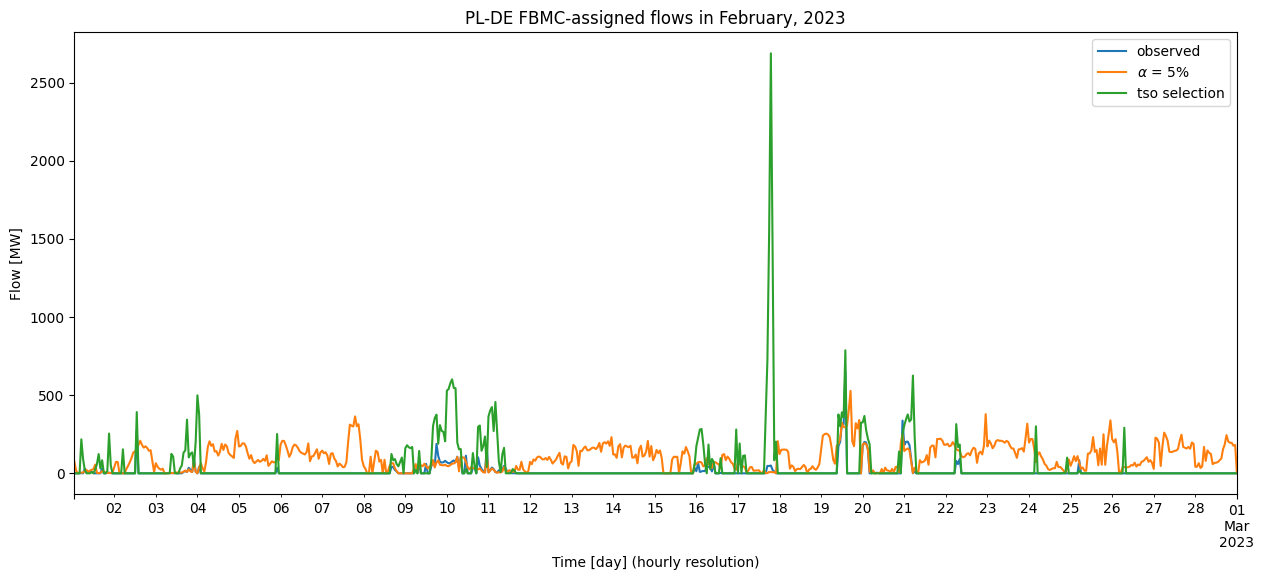

PL-SK


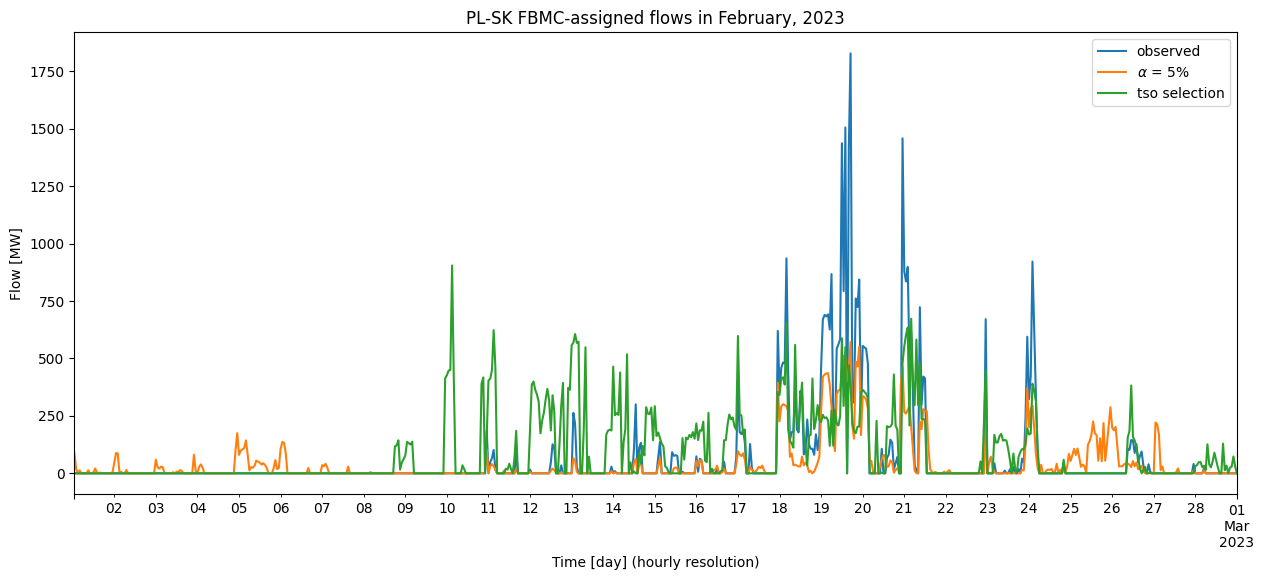

RO-HU


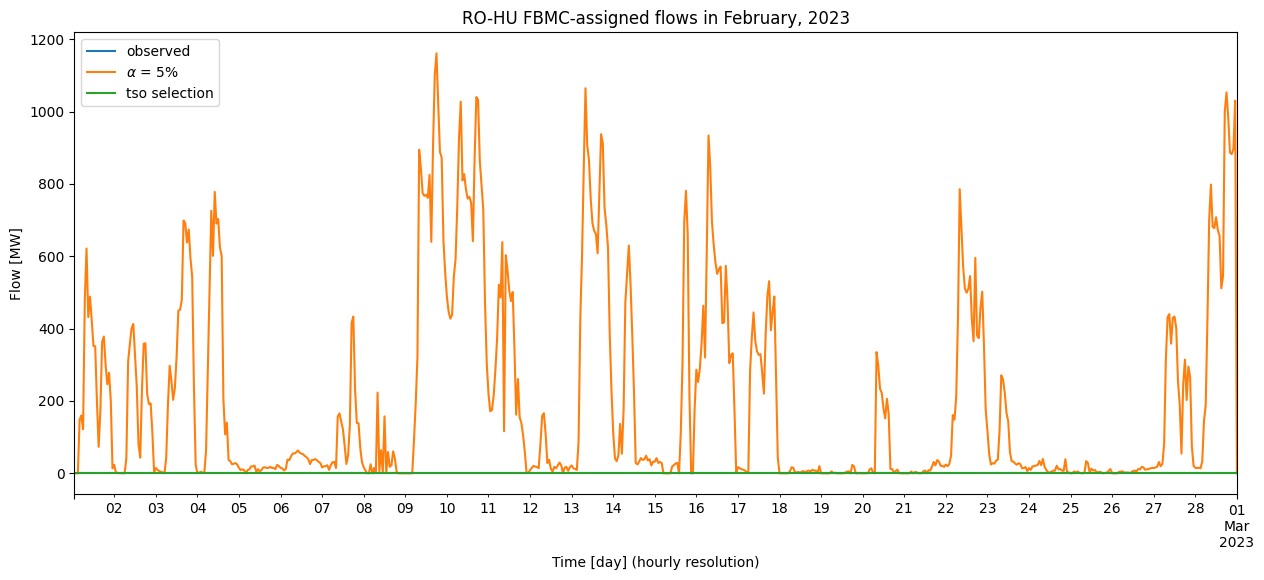

SI-HU


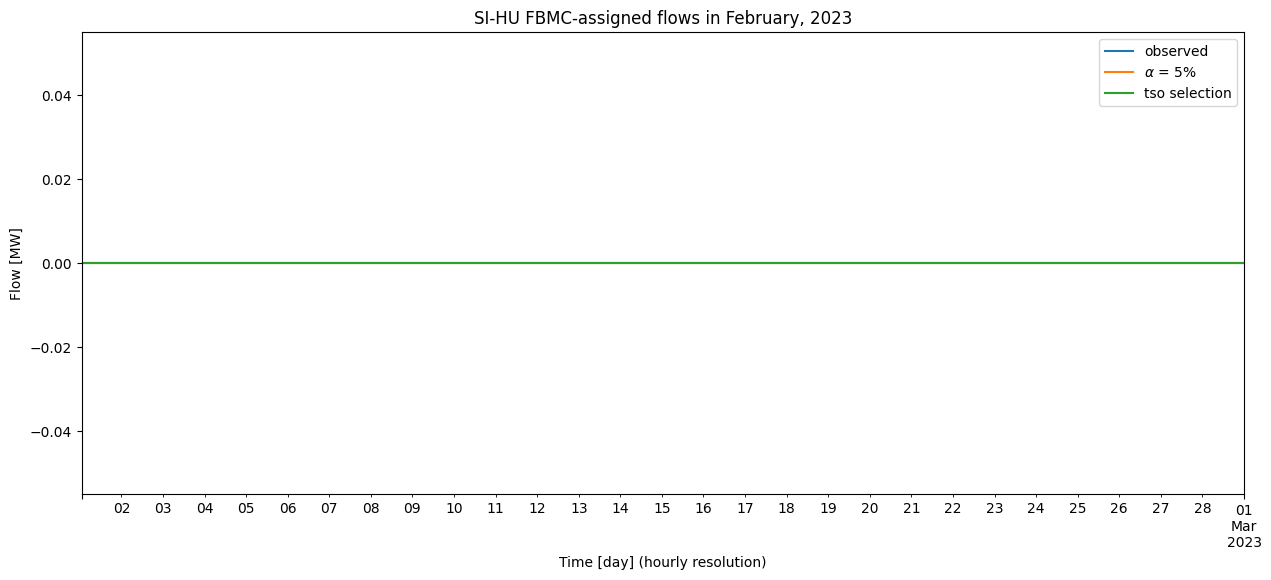

SK-PL


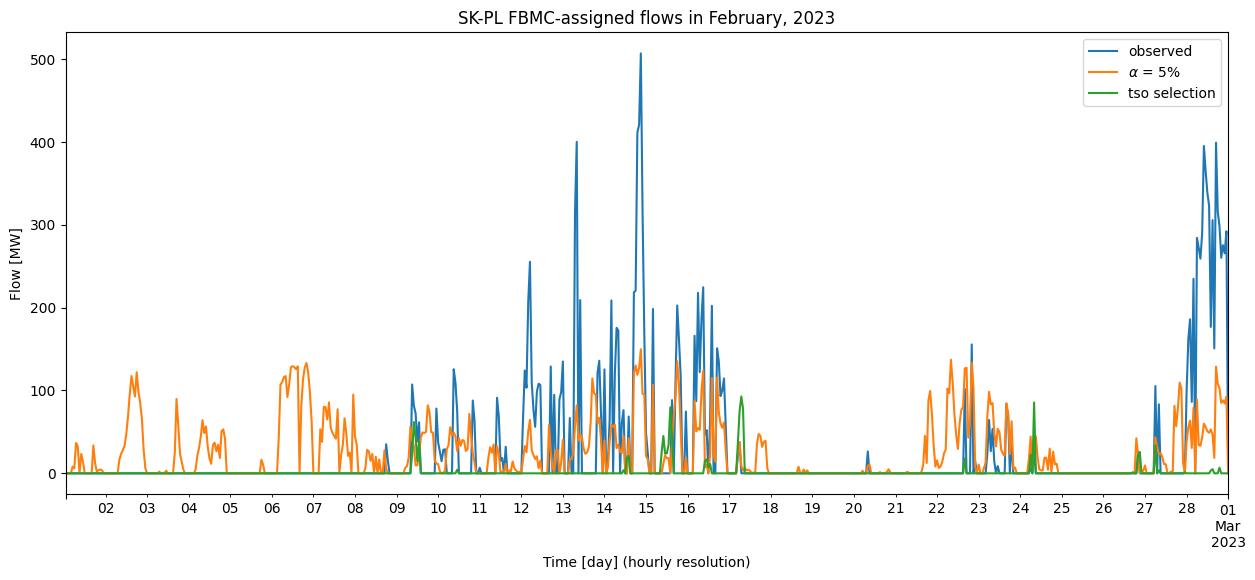

In [92]:
for border in border_flows_obs.keys():
    plt.figure(figsize=(15,6))
    
    print(border)
    df_flow_forecast = df_np_forecasts[0].copy()
    df_flow_forecast['flow_obs'] = border_flows_obs[border]
    ax = df_flow_forecast['flow_obs'].plot()
    
    for index, df in enumerate(df_np_forecasts):
        if index not in [0, 1, 3]:
            df_flow_forecast = df_np_forecasts[0].copy()
            df_flow_forecast['flow_calc'] = border_flow_forecasts[index][border]
            df_flow_forecast['flow_calc'].plot(ax=ax)
    
    plt.title("{0} FBMC-assigned flows in February, 2023".format(border))
    plt.ylabel('Flow [MW]')
    plt.xlabel('Time [day] (hourly resolution)')
    
    ax.legend([
        'observed', 
        #r'$\alpha$ = 10%',
        #r'$\alpha$ = 7%',
        r'$\alpha$ = 5%',
        #r'$\alpha$ = 4%',
        'tso selection'
    ])
    
    plt.show()

"\nfig.legend([ \n    r'$\x07lpha$ = 10%',\n    r'$\x07lpha$ = 5%',\n    r'$\x07lpha$ = 4%',\n    'tso selection'\n], loc='lower center')\nfig.suptitle('FBMC-assigned cross-border flow errors')\n"

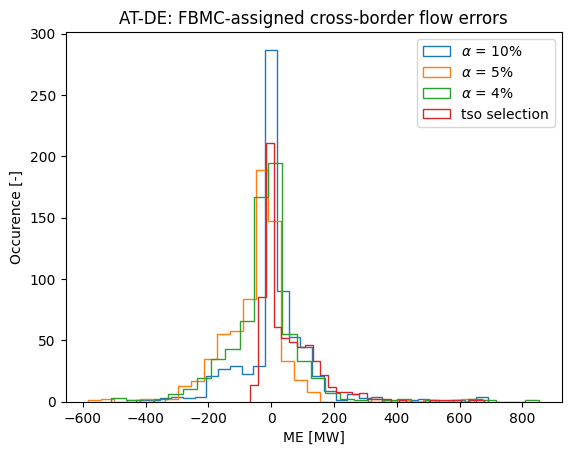

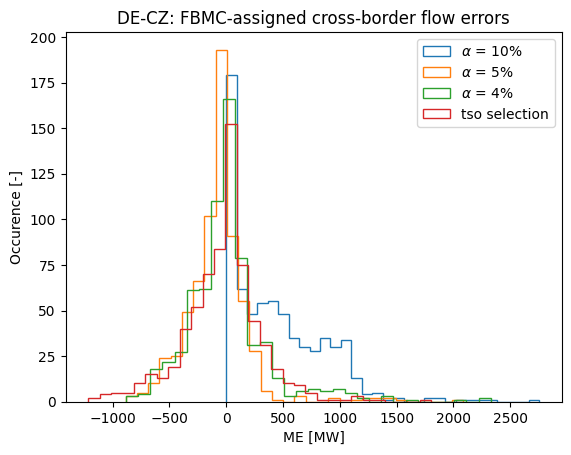

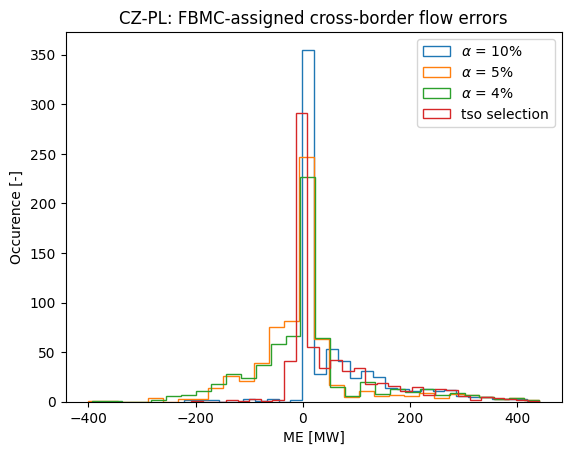

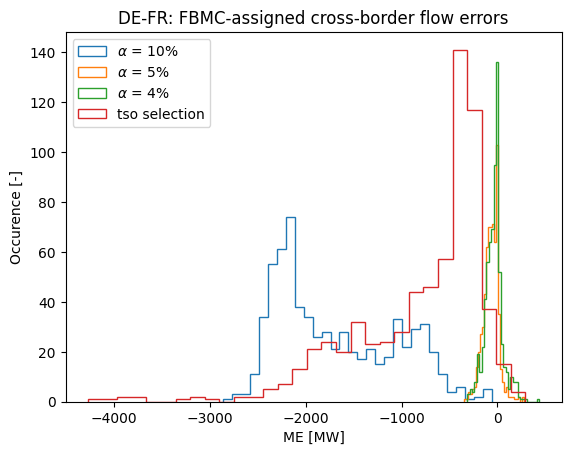

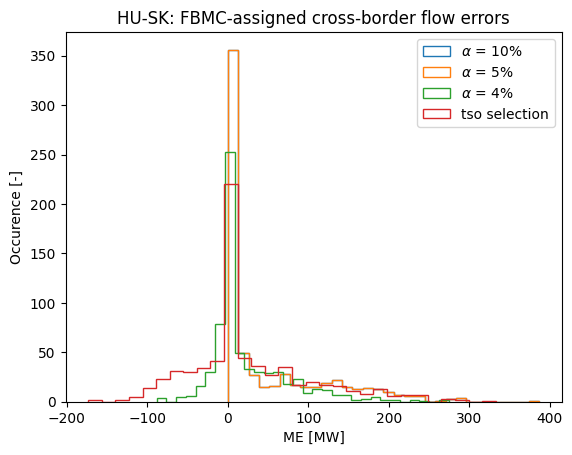

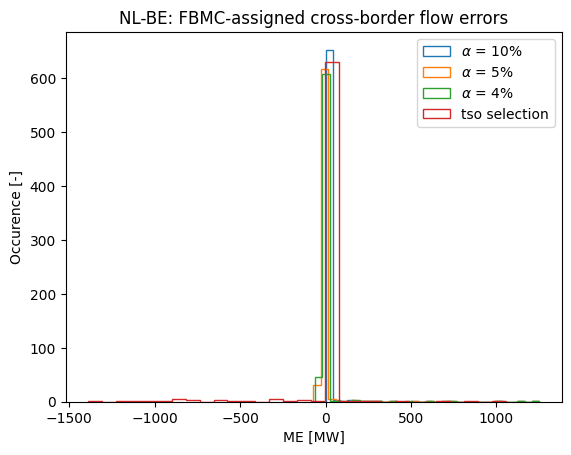

In [81]:
"""
fig, axs = plt.subplots(2, 3, sharey=True, sharex=True, figsize=(15, 10))
border_axs = [
    axs[0, 0], axs[0, 1], axs[0, 2],
    axs[1, 0], axs[1, 1], axs[1, 2],
]
"""

for index, border in enumerate(['AT-DE', 'DE-CZ', 'CZ-PL', 'DE-FR', 'HU-SK', 'NL-BE']):
    fig, ax = plt.subplots()
    for a, df in enumerate(df_np_forecasts):
        if a != 1:
            abs_error = border_flows_obs[border] - border_flow_forecasts[a][border]
            relative_error = abs_error / np.mean(abs(border_flows_obs[border]))
            #border_axs[index].
            ax.hist(
                abs_error, histtype='step', 
                #range=[-3000, 2000],
                bins=30,
                #range=[-50, 50]
            )
            
    ax.set(xlabel='ME [MW]', ylabel='Occurence [-]')
    ax.set_title('{0}: FBMC-assigned cross-border flow errors'.format(border))
    plt.legend([ 
    r'$\alpha$ = 10%',
    r'$\alpha$ = 5%',
    r'$\alpha$ = 4%',
    'tso selection'
    ])
    #border_axs[index].set_title(border)
    
#for ax in axs.flat:
#    ax.set(xlabel='MAE [-]', ylabel='Occurence [-]')

#for ax in axs.flat:
#    ax.label_outer()

"""
fig.legend([ 
    r'$\alpha$ = 10%',
    r'$\alpha$ = 5%',
    r'$\alpha$ = 4%',
    'tso selection'
], loc='lower center')
fig.suptitle('FBMC-assigned cross-border flow errors')
"""

Text(0, 0.5, 'MAE [MW]')

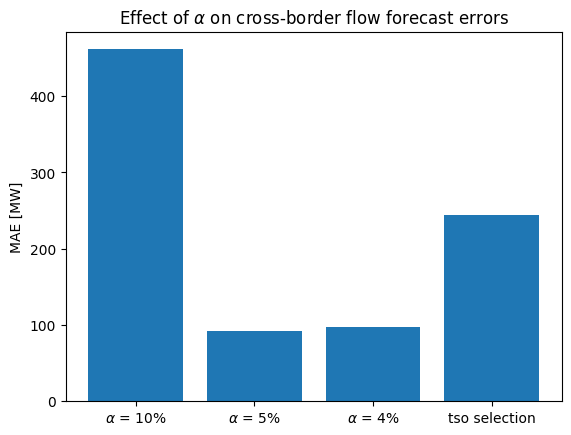

In [90]:
mae_alpha = []

for a, df in enumerate(df_np_forecasts):
    if a != 1:
        abs_errors = []
        for index, border in enumerate(['AT-DE', 'DE-CZ', 'CZ-PL', 'DE-FR', 'HU-SK']):
            for t in range(len(border_flows_obs[border])):
                abs_errors.append(abs(border_flows_obs[border][t] - border_flow_forecasts[a][border][t]))
        mae_alpha.append(np.mean(abs_errors)) 

fig, ax = plt.subplots()
ax.bar([
    r'$\alpha$ = 10%',
    r'$\alpha$ = 5%',
    r'$\alpha$ = 4%',
    'tso selection'
], mae_alpha)
plt.title(r'Effect of $\alpha$ on cross-border flow forecast errors')
ax.set_ylabel('MAE [MW]')

Text(0, 0.5, 'Amount [-]')

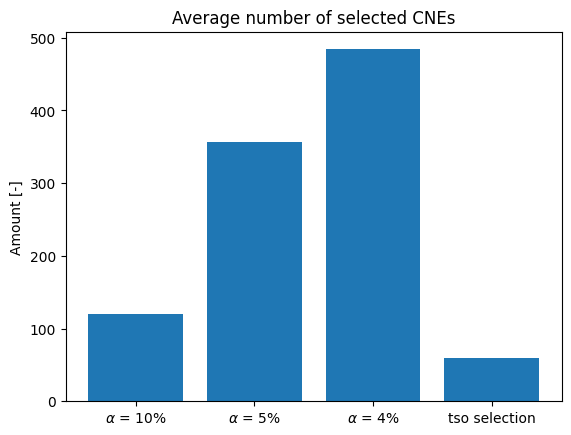

In [91]:
fig, ax = plt.subplots()
ax.bar([
    r'$\alpha$ = 10%',
    r'$\alpha$ = 5%',
    r'$\alpha$ = 4%',
    'tso selection'
], [120, 356, 484, 59])
plt.title('Average number of selected CNEs')
ax.set_ylabel('Amount [-]')